<a href="https://colab.research.google.com/github/sachincs3108/Hands-on_project/blob/master/Univariate_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [5]:
def prepare_data(timeseries_data,n_steps):
  x,y=[],[]
  for i in range(len(timeseries_data)):
    end_ix=i+n_steps
    if end_ix>len(timeseries_data)-1:
      break
    seq_x,seq_y=timeseries_data[i:end_ix],timeseries_data[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x),np.array(y)


In [6]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)


In [7]:
X.shape

(6, 3)

In [8]:
n_features=1
X=X.reshape(X.shape[0],X.shape[1],n_features)
X.shape

(6, 3, 1)

In [11]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 33915.0586
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 33544.8594
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 33151.8008
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 32718.5098
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 32244.2949
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 31737.4355
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 31238.2188
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 30791.1348
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 30403.9199
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 30058.9082
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 29717.0312
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 29347.6562
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 28936.7754
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 28477.2422
Epoch 15/200
1/1 ━━━━━━━━━━━━━

In [15]:
np.array(temp_input[1:])

array([335.18784, 354.5313 , 374.76126], dtype=float32)

In [14]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[224.9612]
1 day input [196.        210.        224.9611969]
1 day output [[237.41461]]
2 day input [210.         224.9611969  237.41461182]
2 day output [[252.51193]]
3 day input [224.9612  237.41461 252.51193]
3 day output [[267.94757]]
4 day input [237.41461 252.51193 267.94757]
4 day output [[283.08392]]
5 day input [252.51193 267.94757 283.08392]
5 day output [[299.89258]]
6 day input [267.94757 283.08392 299.89258]
6 day output [[317.23068]]
7 day input [283.08392 299.89258 317.23068]
7 day output [[335.18784]]
8 day input [299.89258 317.23068 335.18784]
8 day output [[354.5313]]
9 day input [317.23068 335.18784 354.5313 ]
9 day output [[374.76126]]
[224.9612, 237.41461, 252.51193, 267.94757, 283.08392, 299.89258, 317.23068, 335.18784, 354.5313, 374.76126]


Visualize the output

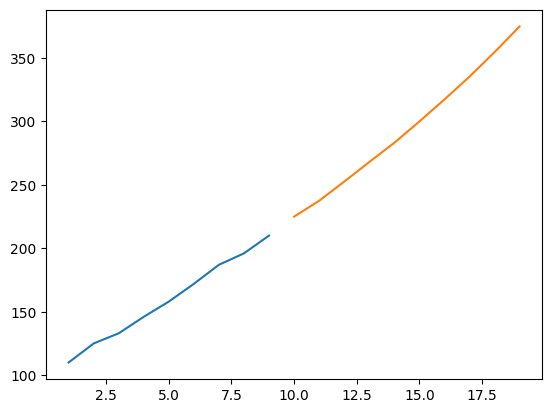

In [16]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)